# Load Dataset

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

In [4]:
print('x_train data:', x_train.shape)
print('x_test data:', x_test.shape)
print('y_train data:', y_train.shape)
print('y_test data:', y_test.shape)

x_train data: (50000, 32, 32, 3)
x_test data: (10000, 32, 32, 3)
y_train data: (50000, 1)
y_test data: (10000, 1)


In [5]:
# Normalize the data (scale the pixel values to the range [0, 1])
x_train, x_test = x_train/255.0, x_test/255.0

In [6]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

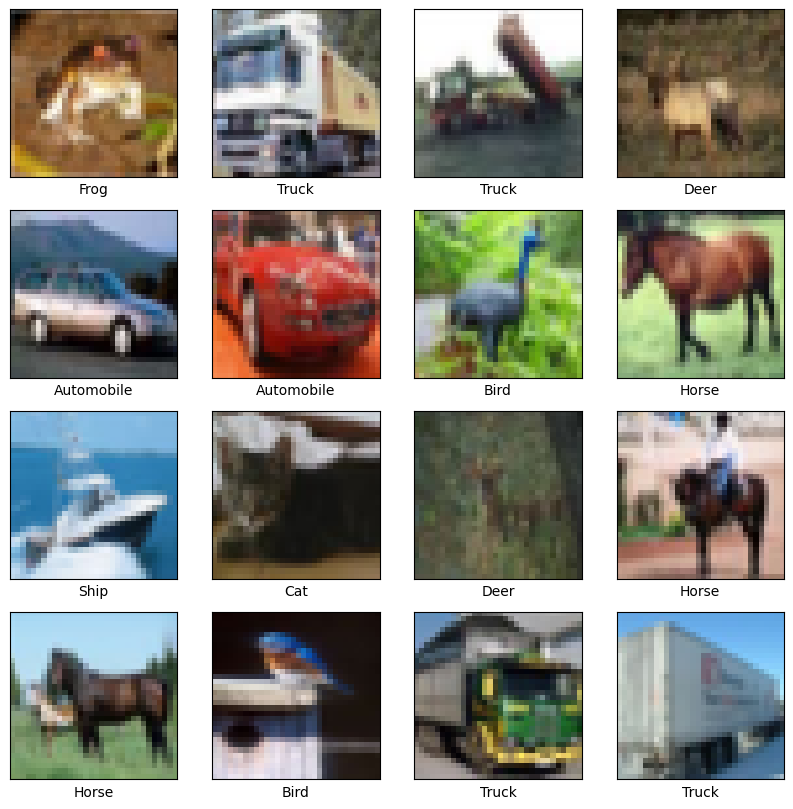

In [7]:
# Visualization few images 
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

# Build Model

In [9]:
# Build the CNN model
model = models.Sequential()

In [10]:
# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

C:\Users\sataa\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Flatten the result
model.add(layers.Flatten())

In [12]:
# Add dense layers

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [13]:
# Model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.3506 - loss: 1.7560 - val_accuracy: 0.5340 - val_loss: 1.2913
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5720 - loss: 1.2016 - val_accuracy: 0.6080 - val_loss: 1.1097
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.6326 - loss: 1.0489 - val_accuracy: 0.5875 - val_loss: 1.1523
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6697 - loss: 0.9397 - val_accuracy: 0.6606 - val_loss: 0.9583
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.6979 - loss: 0.8679 - val_accuracy: 0.6740 - val_loss: 0.9312
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7210 - loss: 0.8015 - val_accuracy: 0.6849 - val_loss: 0.9080
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7352 - loss: 0.7521 - val_accuracy: 0.7019 - val_loss: 0.8646
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.7558 -

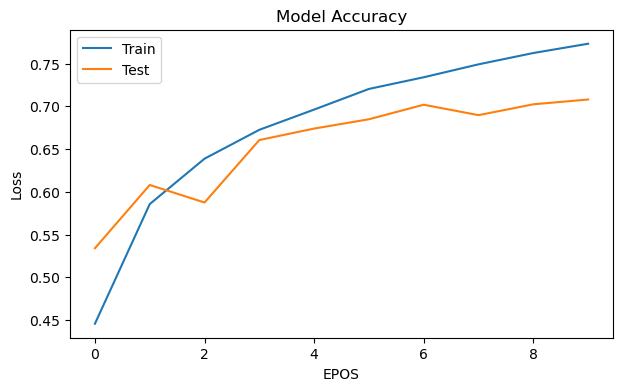

In [16]:
# Validation accuracy values
plt.figure(figsize=(7,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Loss')
plt.xlabel('EPOS')
plt.legend(['Train','Test'],loc= 'upper left')

In [17]:
# Evaluate the model on the test set
test_loss,test_acc= model.evaluate(x_test,y_test,verbose = 2)
print(f"Test Accuracy: {test_acc}")

313/313 - 2s - 5ms/step - accuracy: 0.7080 - loss: 0.8627
Test Accuracy: 0.7080000042915344


In [18]:
# Make predictions on the test set
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


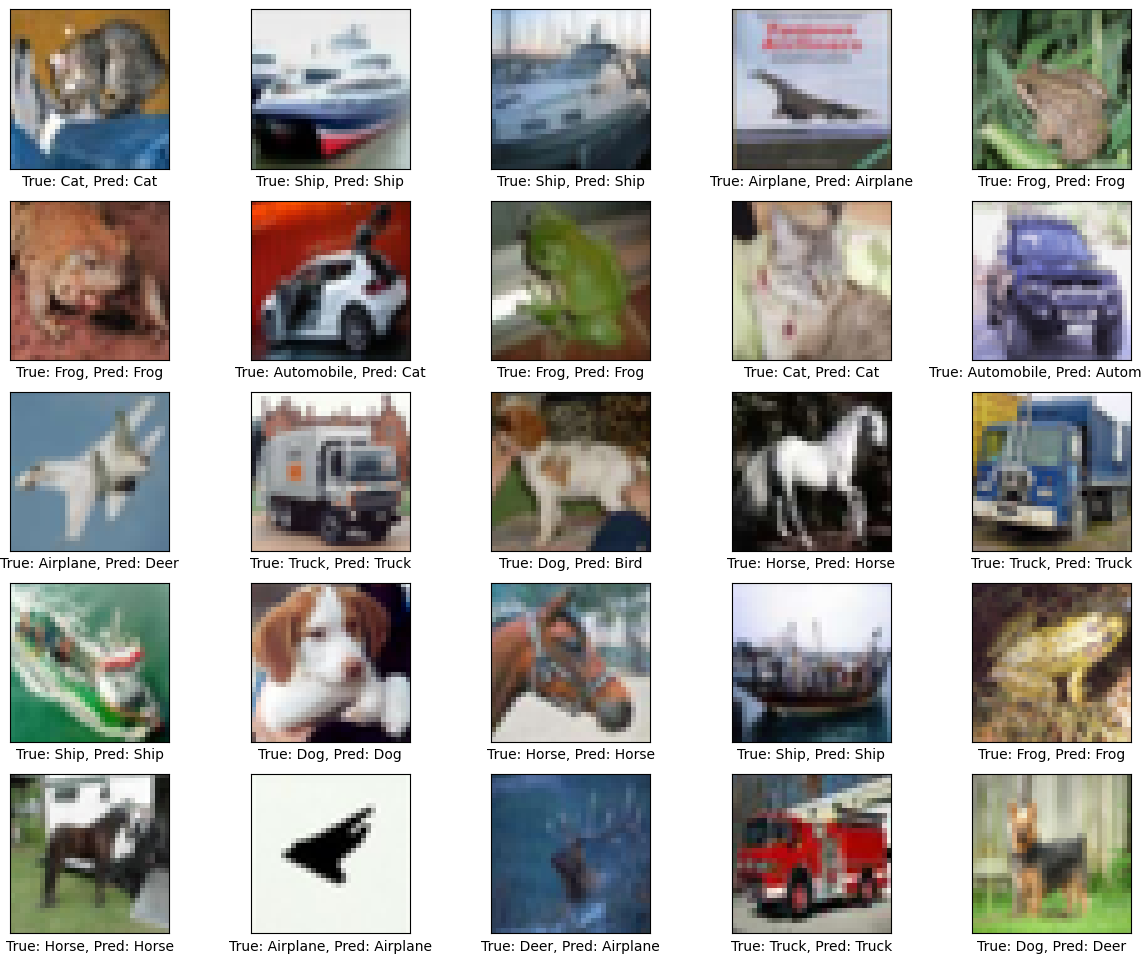

In [19]:
# Display some prediction results
plt.figure(figsize=(15, 12))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test [i])
    predicted_label = class_names[predictions[i].argmax()]
    true_label = class_names[y_test[i][0]]
    plt.xlabel(f"True: {true_label}, Pred: {predicted_label}")
plt.show()
